# <font size= 1> <font color='FFFFFF'> Árboles de decisión

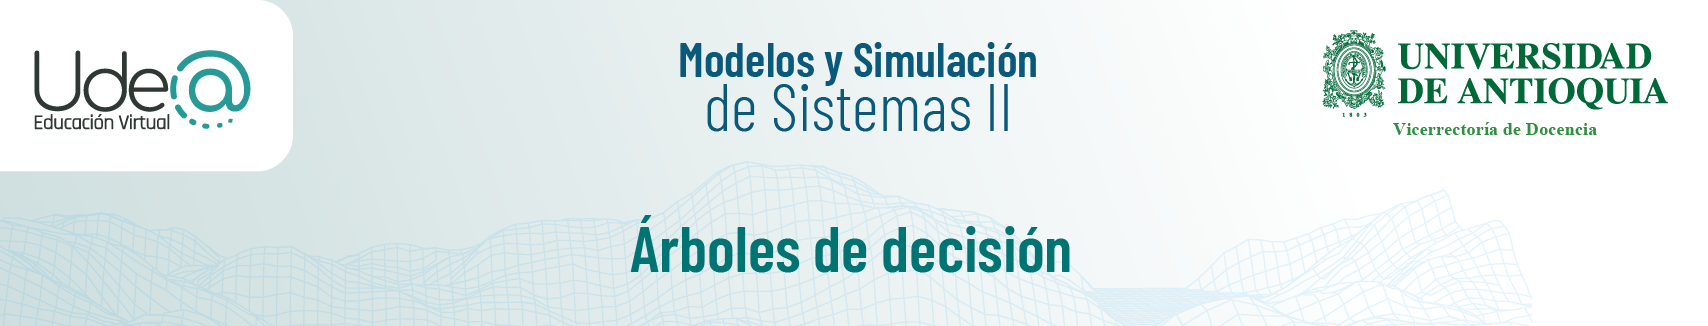

Este aprendizaje es un método para la predicción de variables a partir de funciones discretas, donde la función aprendida es representada a través de un árbol de decisión. Generalmente, es de tipo inductivo y también puede representarse en forma de conjuntos de reglas <b>if-then</b>; por lo tanto, ha sido aplicado con éxito en el desarrollo de sistemas de apoyo al diagnóstico médico, riesgo crediticio, solicitud de préstamos, entre otros.

El siguiente enlace contiene la documentación de la técnica: https://scikit-learn.org/stable/modules/tree.html

Veamos el siguiente conjunto de muestras de la base de datos Iris disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

### <font size= 1> <font color='FFFFFF'> Medida de impureza

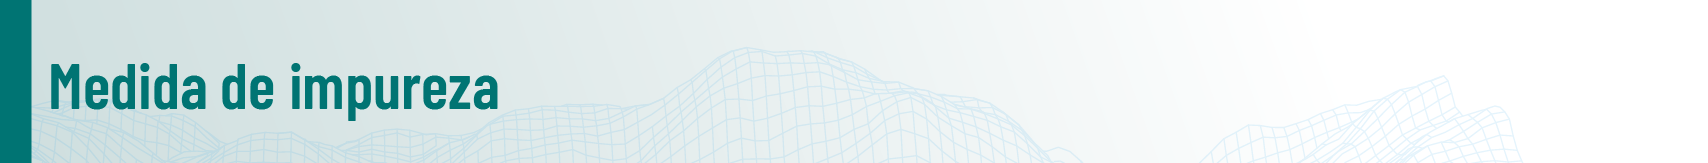

La medida clásica de impureza de una partición $U$ está basada en la medida de entropía. La entropía es en realidad un funcional, es decir, una función que toma como argumento otra función. En este caso particular, la entropía es una medida estimada sobre una función de distribución de masa $P$:

$$I(U) = - \sum_j P(w_j)\log_2 P(w_j)$$

Esta medida será cero si todas las muestras de la partición pertenecen a una misma clase (nodo puro) y será máxima si existe un número igual de muestras de cada clase en la participación (máxima incertidumbre). El valor máximo de impureza incrementa con el número de clases, aunque eso no es un inconveniente porque dicha medida se usa de manera comparativa para establecer el mejor de un grupo de umbrales.

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data[:,1:3], iris.target)

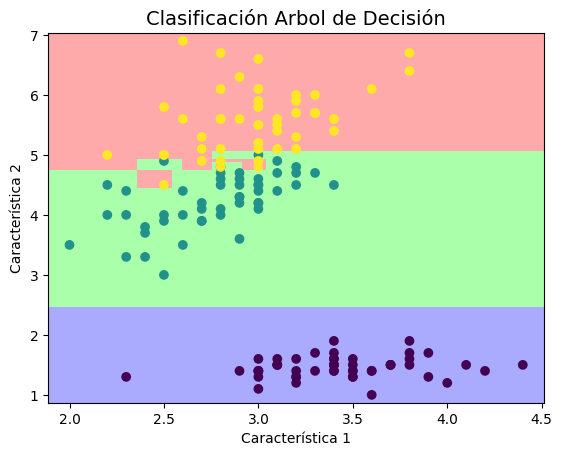

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA',])
X = iris.data
y = iris.target
x_min, x_max = X[:, 1].min() - .1, X[:, 1].max() + .1
y_min, y_max = X[:, 2].min() - .1, X[:, 2].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

Z = np.zeros((100,100))

#Evaluando las fdp's en una malla de valores
for i in range(100):
    for j in range(100):
        #print([xx[1,i],yy[j,1]])
        Z[i,j]=clf.predict(np.array([xx[1,i],yy[j,1]]).reshape(1,2))
plt.figure()
plt.title(u'Clasificación Arbol de Decisión', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Característica 2')
plt.pcolormesh(xx, yy, Z.T, cmap=cmap_light)
plt.scatter(X[:,1], X[:,2], c=y);


In [ ]:
import graphviz
import collections
import pydotplus
from IPython.display import Image 

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)
clf = clf.fit(iris.data, iris.target)

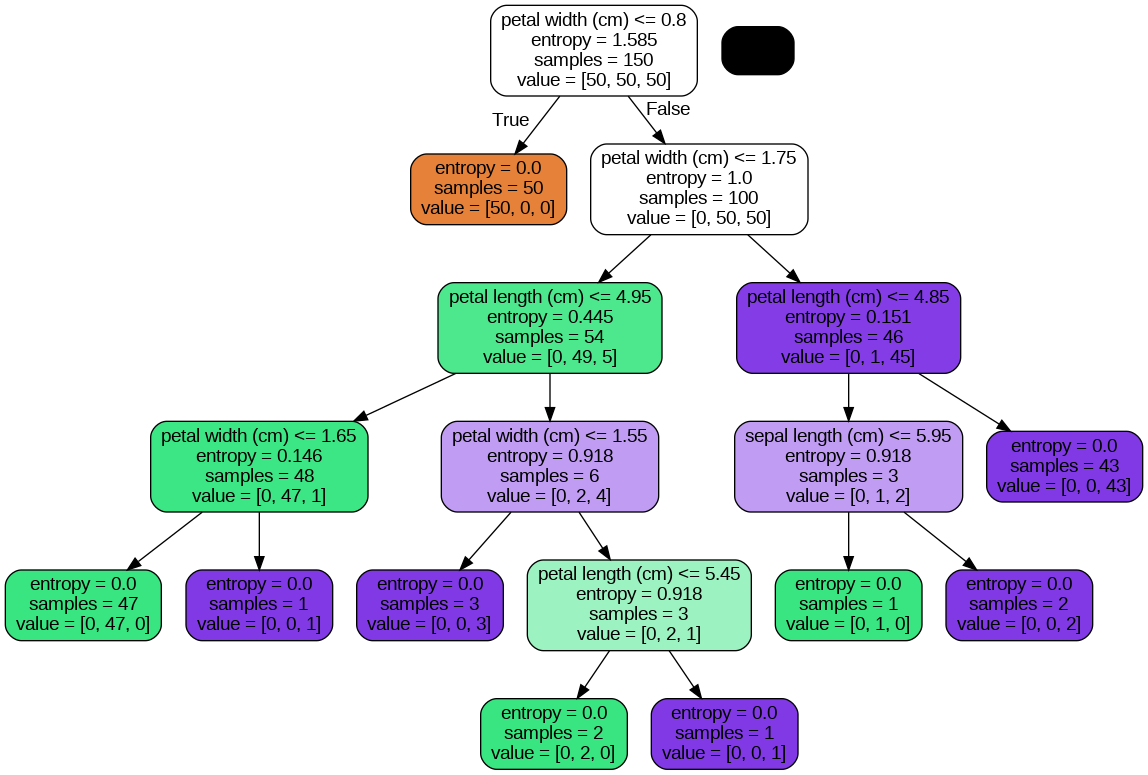

In [ ]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### <font size= 1> <font color='FFFFFF'> Comité de máquinas (Métodos de ensamble)

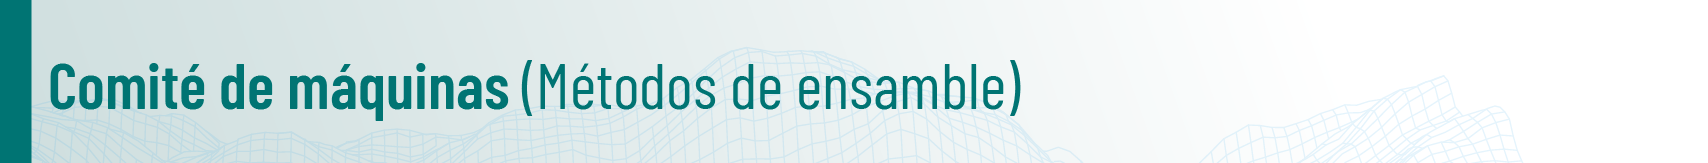

Es la combinación de varios modelos para tomar una decisión final ([ver documentación](https://scikit-learn.org/stable/modules/ensemble.html#)).

Por su parte, el **voting** es el método más simple, cuyo objetivo es combinar las fortalezas de cada uno y tomar la decisión basada en concenso ([ver documentación](https://towardsdatascience.com/use-voting-classifier-to-improve-the-performance-of-your-ml-model-805345f9de0e#:~:text=A%20voting%20classifier%20is%20a,voting%20for%20each%20estimator%20output)).


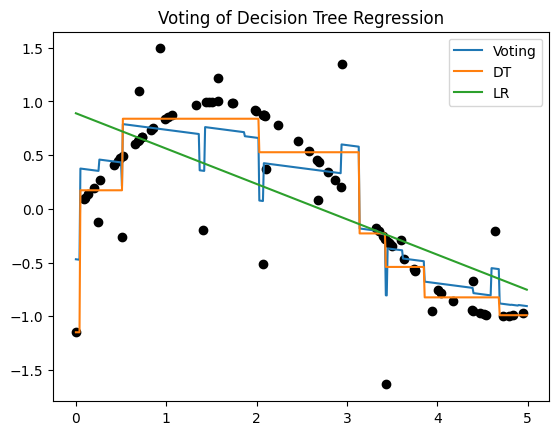

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model

clf_a = DecisionTreeRegressor(max_depth=3)
clf_b = DecisionTreeRegressor(max_depth=5)
clf_c = LinearRegression()
clf = VotingRegressor([('DT1', clf_a), ('DT2', clf_b), ('lr', clf_c)]).fit(X, y)
#clf = VotingRegressor([('DT1', clf_a), ('DT2', clf_b)]).fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf.predict(X_test)
y_2 = clf.estimators_[0].predict(X_test)
y_3 = clf.estimators_[2].predict(X_test)

plt.plot(X,y,'o',color='black')
plt.plot(X_test,y_1,label='Voting')
plt.plot(X_test,y_2,label='DT')
plt.plot(X_test,y_3,label='LR')
# Plot the resu  et")
plt.title("Voting of Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
clf.estimators_[0]

DecisionTreeRegressor(max_depth=3)

## <font size= 1> <font color='FFFFFF'> Bagging

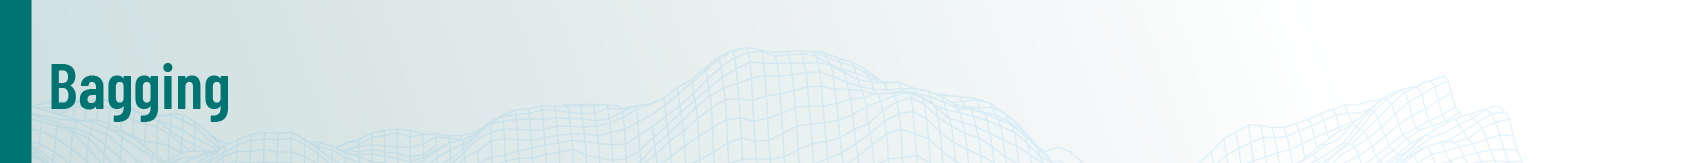

Consiste en realizar $B$ muestreos con substitución a partir del conjunto de entrenamiento y entrenar un modelo mediante cada uno de los conjuntos de muestras ([ver documentación](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator)).

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


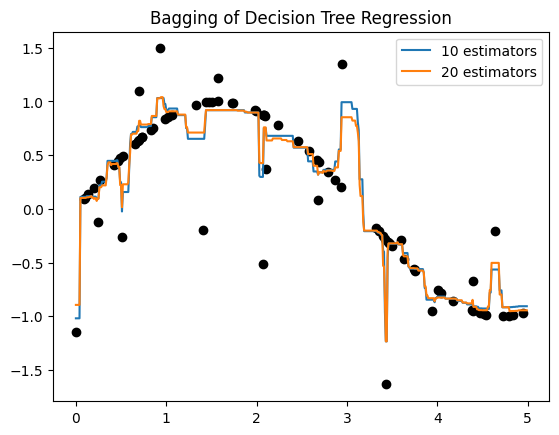

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
from sklearn.tree import DecisionTreeRegressor
clf_b = DecisionTreeRegressor(max_depth=5)
clf_1 = BaggingRegressor(base_estimator=clf_b, n_estimators=10, random_state=0).fit(X, y)
clf_2 = BaggingRegressor(base_estimator=clf_b, n_estimators=20, random_state=0).fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)

plt.plot(X,y,'o',color='black')
plt.plot(X_test,y_1,label='10 estimators')
plt.plot(X_test,y_2,label='20 estimators')
# Plot the resu  et")
plt.title("Bagging of Decision Tree Regression")
plt.legend()
plt.show()

## <font size= 1> <font color='FFFFFF'> Random forest 

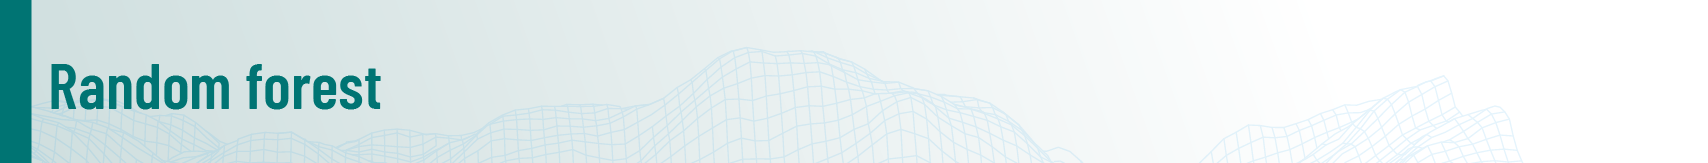

Al igual que en bagging, la decisión final se toma a partir de la combinación de las decisiones de los $B$ árboles entrenados ([ver documentación](https://scikit-learn.org/stable/modules/ensemble.html#forest)).

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
digits = load_digits()

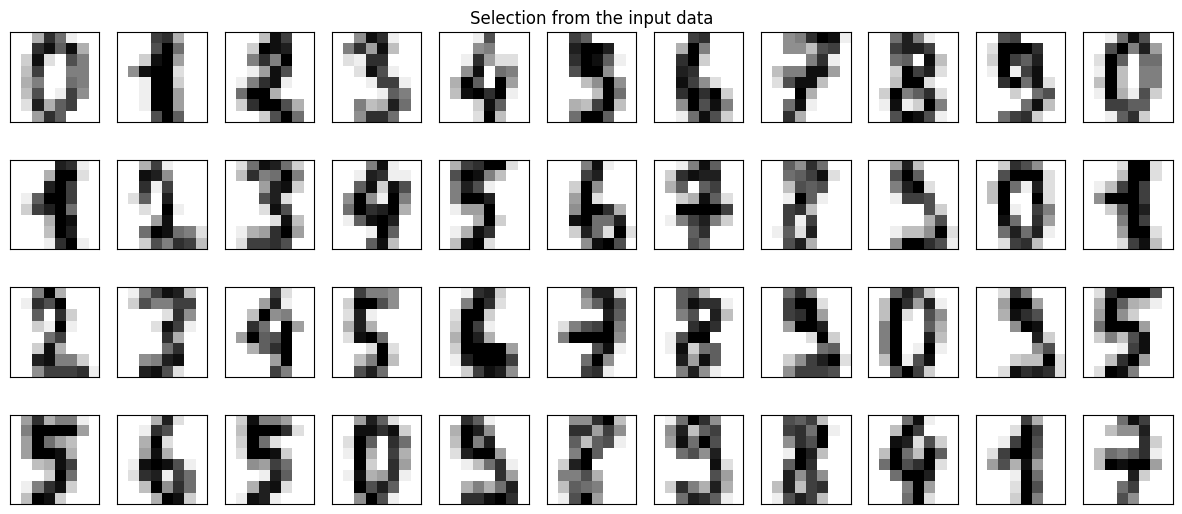

In [ ]:
real_data = digits.data[:44].reshape((4, 11, -1))
fig, ax = plt.subplots(5, 11, subplot_kw=dict(xticks=[], yticks=[]),figsize=(15,8))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
ax[0, 5].set_title('Selection from the input data')
plt.show()


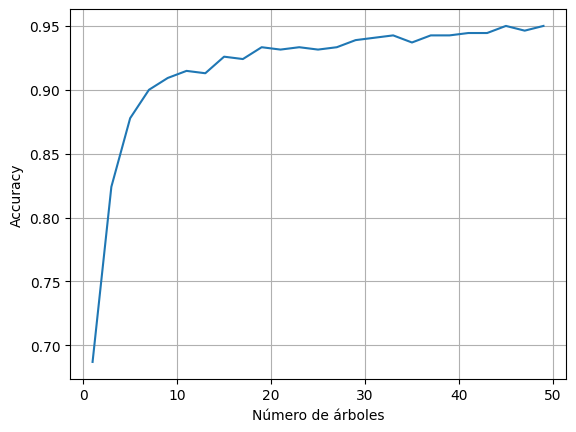

In [ ]:
Performance = []
N = digits.data.shape[0]
ind = np.random.permutation(N)
for i in range(1,50,2):
    clf = RandomForestClassifier(n_estimators=i, max_depth=6, random_state=0)
    clf = clf.fit(digits.data[ind[:int(N*0.7)],:], digits.target[ind[:int(N*0.7)]])
    Performance.append(clf.score(digits.data[ind[int(N*0.7):],:], digits.target[ind[int(N*0.7):]]))
Perform = np.array(Performance)
plt.plot(np.arange(1,50,2),Perform)
plt.xlabel('Número de árboles')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

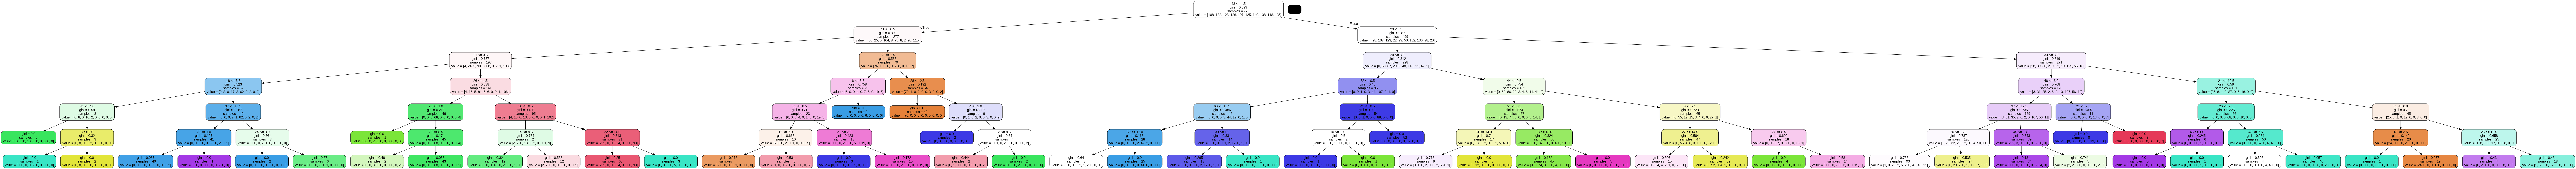

In [ ]:
# Visualize data
dot_data = tree.export_graphviz(clf.estimators_[0],
                                feature_names=np.arange(digits.data.shape[1]),
                                out_file=None,
                                filled=True,
                                rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

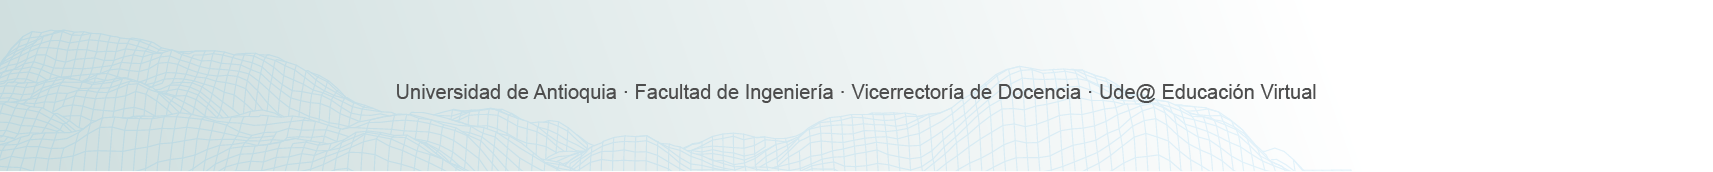